In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
from datetime import time
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('/Users/rebeccahe/vbase-py-utils')
from vbase_utils.stats.robust_betas import * 
from vbase_utils.stats.pit_robust_betas import * 
import matplotlib.pyplot as plt

from new_regression_model import robust_matrix_regression

In [16]:
market_path = "Index Returns/Raw Returns/Market Cap Weighted/"
sqrt_path = "Index Returns/Raw Returns/Sqrt Market Cap Weighted/"
years = ['2021','2022','2023','2024','2025']
market_files = [file for file in os.listdir(market_path) if file.endswith('.csv')]
sqrt_files = [file for file in os.listdir(sqrt_path) if file.endswith('.csv')]
market_index = pd.DataFrame()
sqrt_index = pd.DataFrame()
for y in years:
    df_market = pd.read_csv(market_path+y+'.csv')
    df_sqrt = pd.read_csv(sqrt_path+y+'.csv')
    market_index = pd.concat([market_index, df_market])
    sqrt_index = pd.concat([sqrt_index, df_sqrt])
market_index.set_index('time',inplace=True)
sqrt_index.set_index('time',inplace=True)

In [10]:
cum_market_index = np.cumprod(market_index + 1) - 1
cum_sqrt_index = np.cumprod(sqrt_index + 1) - 1

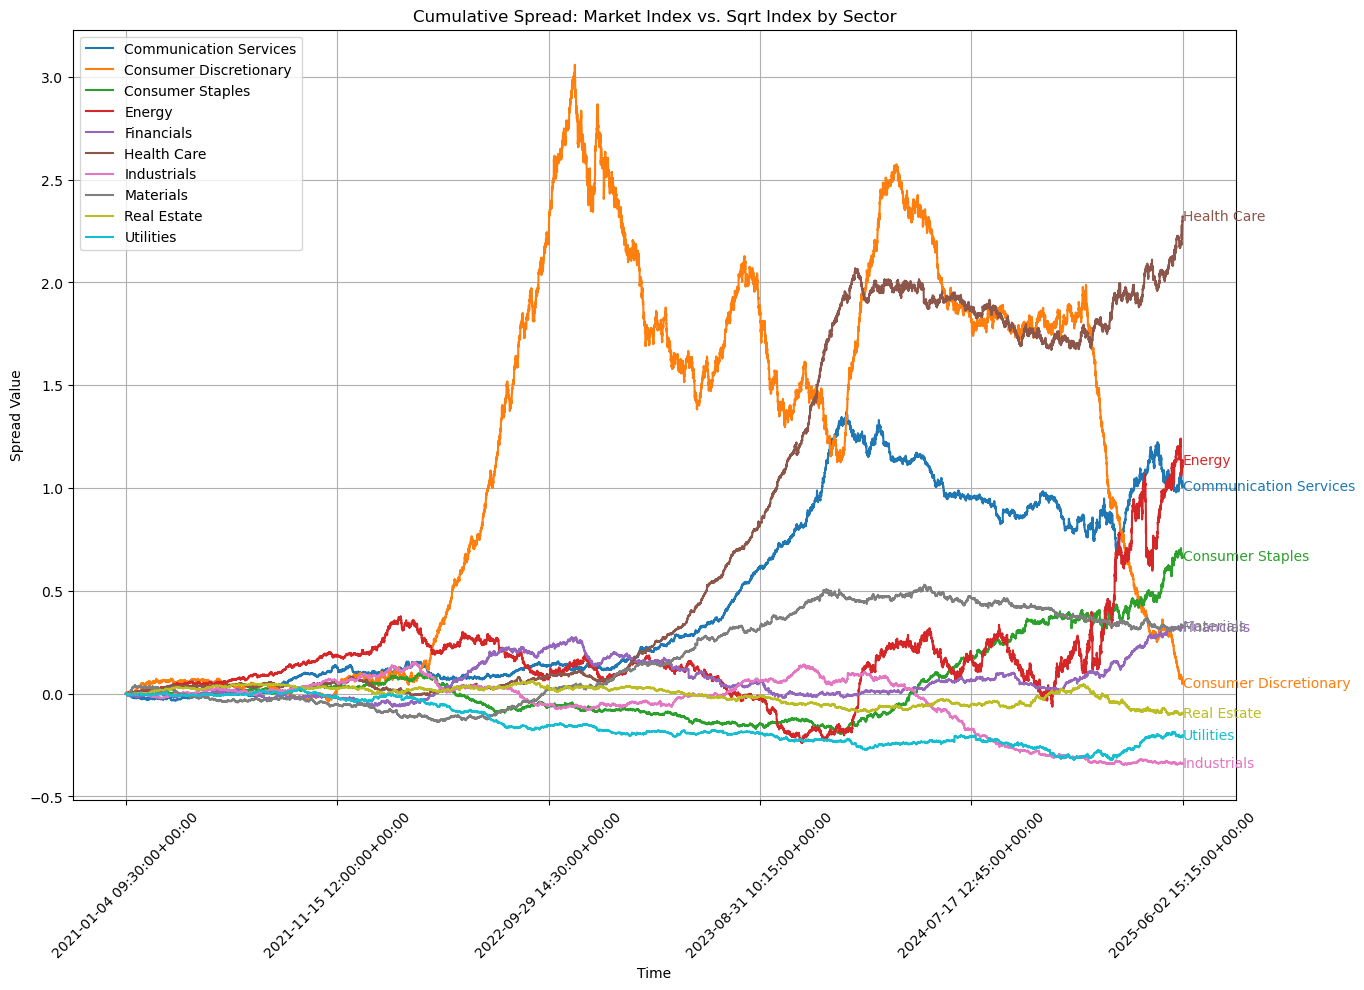

In [ ]:
# Removed the Information Technology sector, because its peak value is too large
spread = cum_market_index - cum_sqrt_index
plt.figure(figsize=(15,10))
for sector in spread.columns:
    if sector != 'Information Technology':
        x = spread[sector].index
        y = spread[sector].values
        line = plt.plot(x,y,label=sector)
        last_x = x[-1]
        last_y = y[-1]
        plt.text(last_x, last_y, sector, 
                ha='left', va='center',  # Align text to the right of the point
                fontsize=10, color=line[0].get_color())
    
selected_ticks = int(len(x) / 5) * np.arange(6)
plt.xticks(selected_ticks, [str(x[i]) for i in selected_ticks], rotation=45)
plt.grid(True)
plt.legend()  # Show sector labels in a legend
plt.title("Cumulative Spread: Market Index vs. Sqrt Index by Sector")
plt.xlabel("Time")
plt.ylabel("Spread Value")
plt.show()

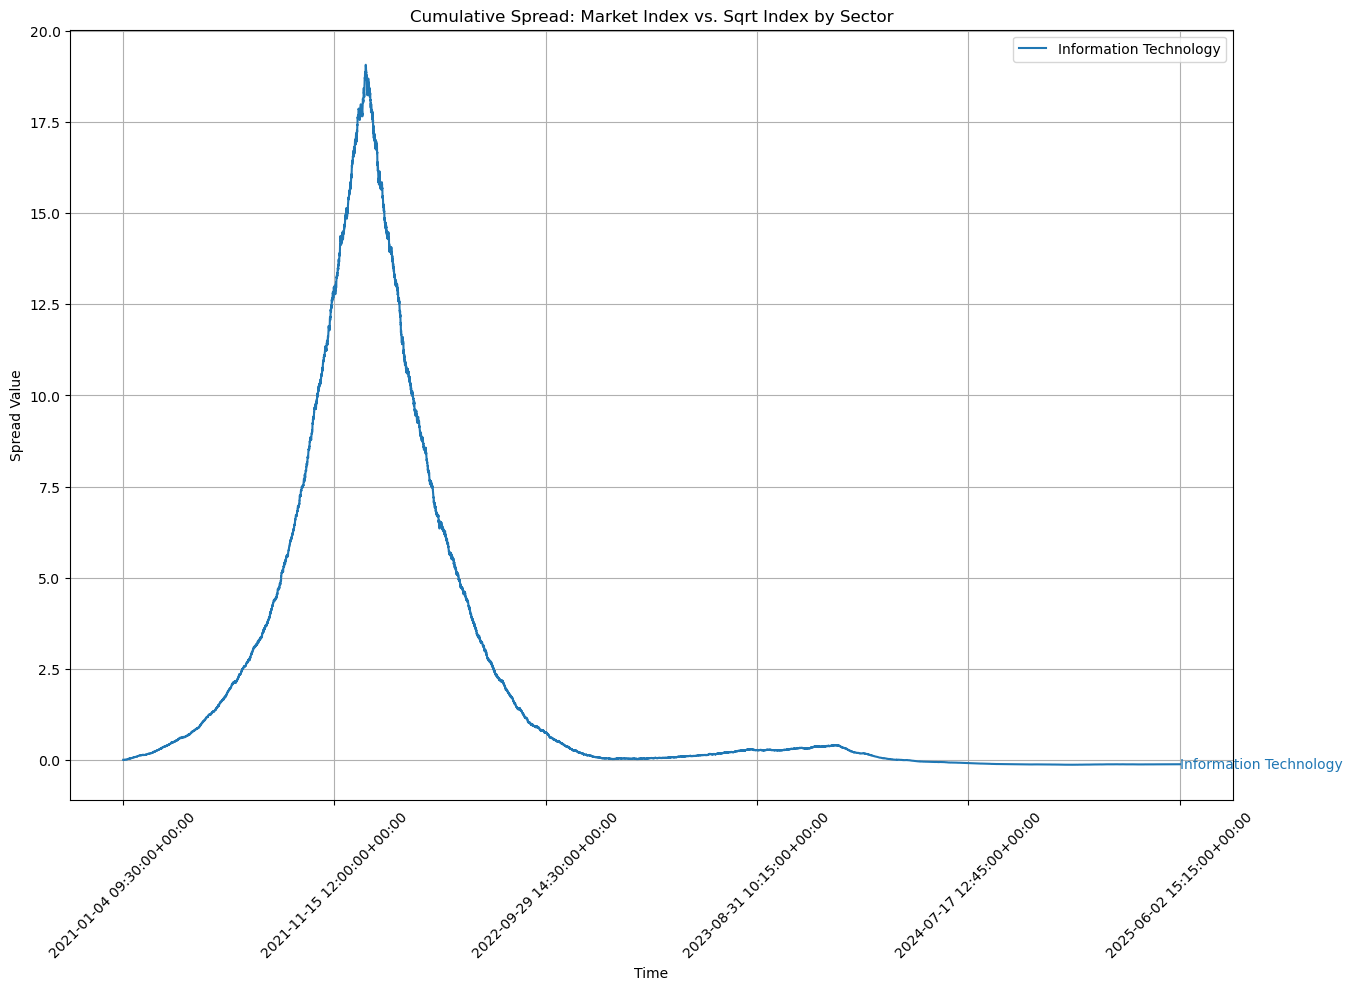

In [ ]:
plt.figure(figsize=(15,10))
sector = 'Information Technology'
x = spread[sector].index
y = spread[sector].values
line = plt.plot(x,y,label=sector)
last_x = x[-1]
last_y = y[-1]
plt.text(last_x, last_y, sector, 
        ha='left', va='center',  # Align text to the right of the point
        fontsize=10, color=line[0].get_color())
    
selected_ticks = int(len(x) / 5) * np.arange(6)
plt.xticks(selected_ticks, [str(x[i]) for i in selected_ticks], rotation=45)
plt.grid(True)
plt.legend()  # Show sector labels in a legend
plt.title("Cumulative Spread: Market Index vs. Sqrt Index by Sector")
plt.xlabel("Time")
plt.ylabel("Spread Value")
plt.show()

In [17]:
res_market_path = "Index Returns/Hedged Returns/Market Cap Weighted/"
res_sqrt_path = "Index Returns/Hedged Returns/Sqrt Market Cap Weighted/"
years = ['2021','2022','2023','2024']
months = ['0'+str(i) if i < 10 else str(i) for i in range(1,13)]
res_market_files = [file for file in os.listdir(res_market_path) if file.endswith('.csv')]
res_sqrt_files = [file for file in os.listdir(res_sqrt_path) if file.endswith('.csv')]
res_market_index = pd.DataFrame()
res_sqrt_index = pd.DataFrame()
for y in years:
    for m in months:
        res_df_market = pd.read_csv(res_market_path+y+'/'+m+'.csv')
        res_df_sqrt = pd.read_csv(res_sqrt_path+y+'/'+m+'.csv')
        res_market_index = pd.concat([res_market_index, res_df_market])
        res_sqrt_index = pd.concat([res_sqrt_index, res_df_sqrt])
for m in months[:6]:
    res_df_market = pd.read_csv(res_market_path+'2025/'+m+'.csv')
    res_df_sqrt = pd.read_csv(res_sqrt_path+'2025/'+m+'.csv')
    res_market_index = pd.concat([res_market_index, res_df_market])
    res_sqrt_index = pd.concat([res_sqrt_index, res_df_sqrt])
    
res_market_index.set_index('time',inplace=True)
res_sqrt_index.set_index('time',inplace=True)

In [6]:
cum_res_market_index

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
time,,,,,,,,,,,
2021-01-04 09:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 09:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 10:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04 10:15:00+00:00,-0.004796,-0.000715,0.000799,-0.000205,-0.001333,-0.001736,-0.003403,-0.001356,0.001563,0.000131,-0.000446
2021-01-04 10:30:00+00:00,-0.003161,-0.000088,0.001534,0.000308,-0.001981,-0.001209,-0.003452,-0.001641,0.001161,0.001770,-0.003129
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02 15:00:00+00:00,2.208460,0.656908,3.745580,7.065924,0.577942,7.536029,0.499121,-0.889195,0.243381,0.826331,1.009918
2025-06-02 15:15:00+00:00,2.216448,0.656874,3.748467,7.067846,0.575976,7.550166,0.497986,-0.889145,0.242769,0.826578,1.010803
2025-06-02 15:30:00+00:00,2.222042,0.657959,3.745449,7.086350,0.574198,7.553230,0.493263,-0.889298,0.242158,0.827712,1.011513


In [3]:
cum_res_market_index = np.cumprod(res_market_index + 1) - 1
cum_res_sqrt_index = np.cumprod(res_sqrt_index + 1) - 1

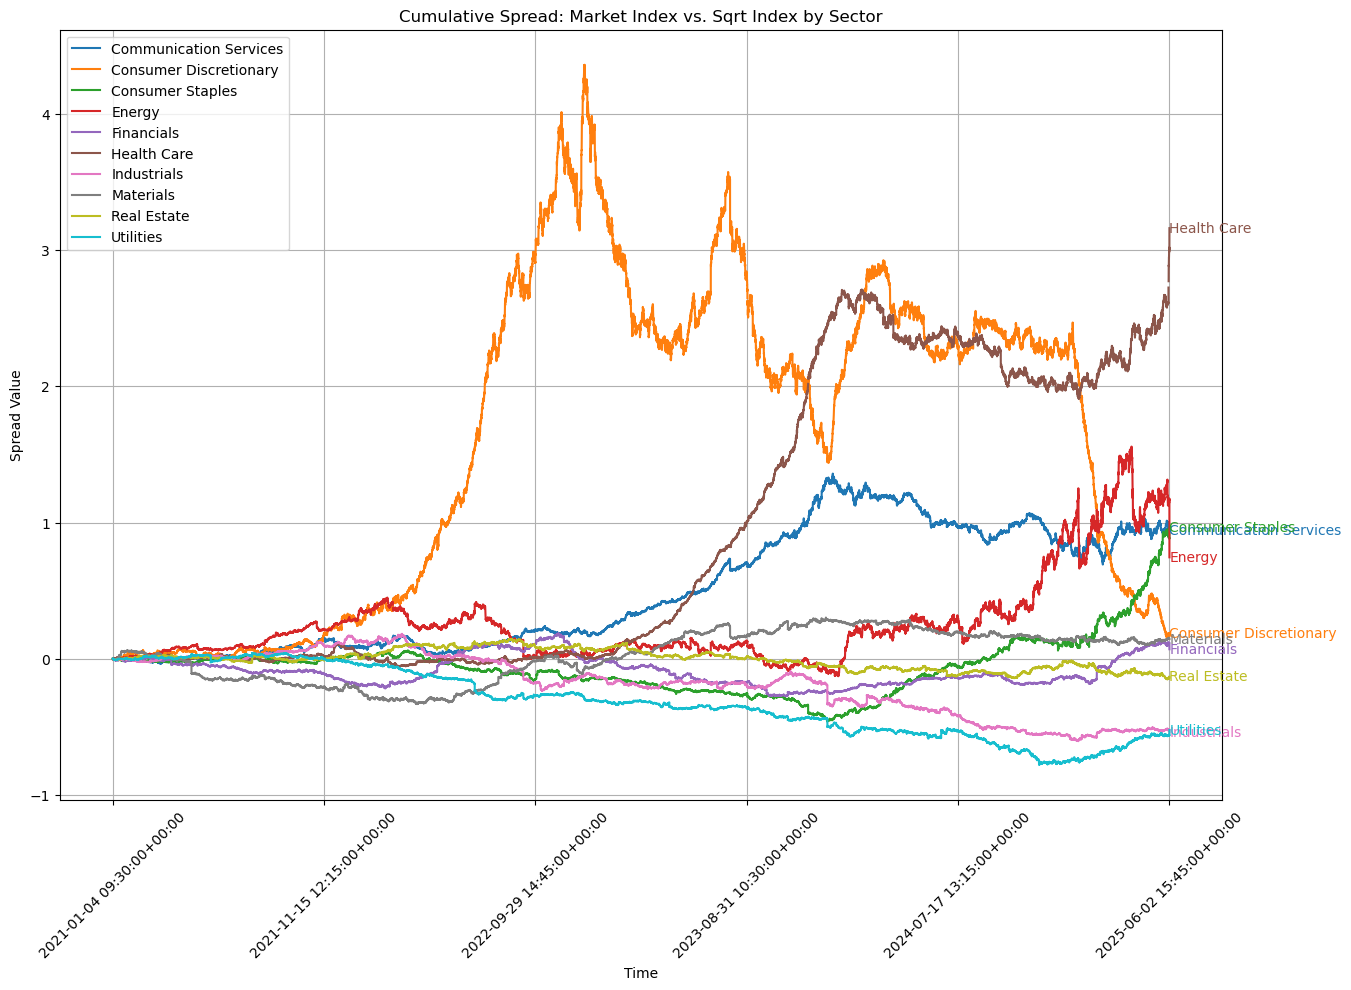

In [5]:
# Removed the Information Technology sector, because its peak value is too large
res_spread = cum_res_market_index - cum_res_sqrt_index
plt.figure(figsize=(15,10))
for sector in res_spread.columns:
    if sector != 'Information Technology':
        x = res_spread[sector].index
        y = res_spread[sector].values
        line = plt.plot(x,y,label=sector)
        last_x = x[-1]
        last_y = y[-1]
        plt.text(last_x, last_y, sector, 
                ha='left', va='center',  # Align text to the right of the point
                fontsize=10, color=line[0].get_color())
    
selected_ticks = int(len(x) / 5) * np.arange(6)
plt.xticks(selected_ticks, [str(x[i]) for i in selected_ticks], rotation=45)
plt.grid(True)
plt.legend()  # Show sector labels in a legend
plt.title("Cumulative Spread: Market Index vs. Sqrt Index by Sector")
plt.xlabel("Time")
plt.ylabel("Spread Value")
plt.show()

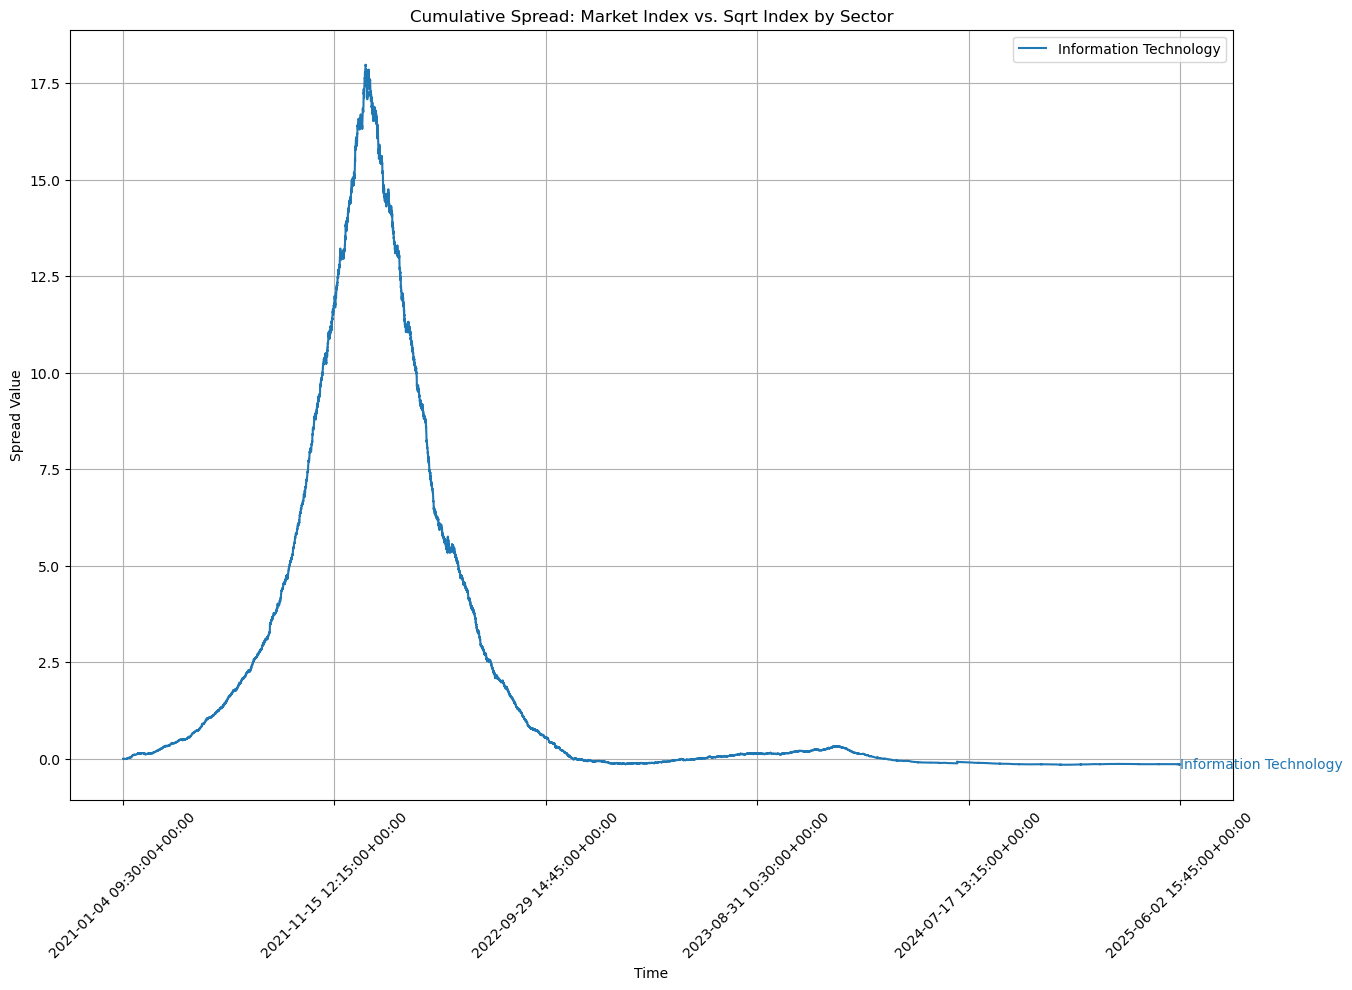

In [12]:
plt.figure(figsize=(15,10))
sector = 'Information Technology'
x = res_spread[sector].index
y = res_spread[sector].values
line = plt.plot(x,y,label=sector)
last_x = x[-1]
last_y = y[-1]
plt.text(last_x, last_y, sector, 
        ha='left', va='center',  # Align text to the right of the point
        fontsize=10, color=line[0].get_color())
    
selected_ticks = int(len(x) / 5) * np.arange(6)
plt.xticks(selected_ticks, [str(x[i]) for i in selected_ticks], rotation=45)
plt.grid(True)
plt.legend()  # Show sector labels in a legend
plt.title("Cumulative Spread: Market Index vs. Sqrt Index by Sector")
plt.xlabel("Time")
plt.ylabel("Spread Value")
plt.show()